In [7]:
%matplotlib inline

import pickle
import warnings
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import beta, uniform, expon, lognorm, weibull_min, chi2, t, gumbel_r, skewnorm

from src.learner import LinearMDCRL
from experiments.rand import rand_model

warnings.filterwarnings('ignore')

# Main function

In [8]:
def run_experiments(info):
    metadata = info["metadata"]
    nexp = metadata["nexp"]
    nsamples_list = metadata["nsamples_list"]
    for s_ix, n in enumerate(nsamples_list):
        print(n)
        for exp_ix in range(nexp):
            
            # Info on progress
            if not exp_ix%50:
                print(exp_ix)
                
            # Sample data
            m = info["metadata"]["model_specs"].copy()
            m["sample_sizes"] = [n for _ in range(m["nr_doms"])]
            data, g, B_true = rand_model(m)
            A_true = np.transpose(g.to_amat())

            # Fit model
            model = LinearMDCRL(measure=info["metadata"]["measure"], gamma=0.1)
            start_time = time()
            model.fit(data)
            time_spent = time() - start_time

            # Score output
            nr_joint = model.nr_joint
            mixing_error = model.score_shared_columns(B_true, len(m["joint_idx"]))
            if nr_joint == len(m["joint_idx"]):
                graph_error, A_hat = model.score_graph_param_matrix(A_true)
            else:
                graph_error = None


            # Save results
            info["results"][(s_ix, exp_ix)] = dict(
                nr_joint = nr_joint,
                mixing_error = mixing_error,
                graph_error = graph_error,
                time_spent = time_spent
            )
    return info

# Plot error distributions

In [9]:
rvs = [beta(2,3), beta(2,5), chi2(df=4), gumbel_r, lognorm(s=1),
    weibull_min(c=2), expon(scale=0.1), skewnorm(a=6), skewnorm(a=12)]

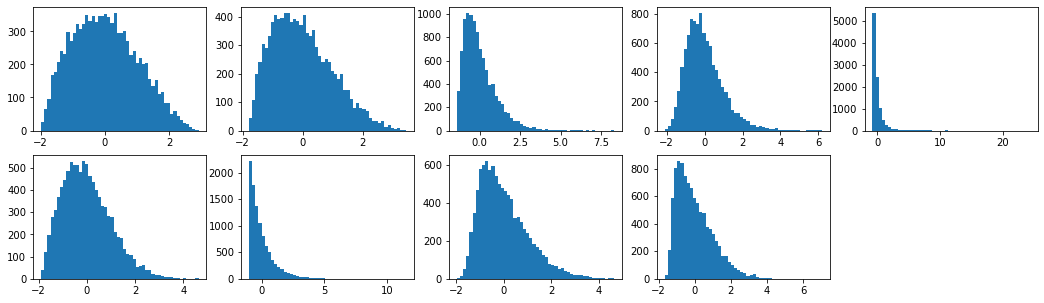

In [17]:
def sample_normed(n, rv):
    return (rv.rvs(size=n) - rv.mean()) / rv.std()

n = 10000
samples = np.zeros((n,len(rvs)))
for i, rv in enumerate(rvs):
    samples[:,i] = sample_normed(n,rv)
    
fig, ax = plt.subplots(2, 5, figsize=(18,5))
fig.delaxes(ax[1,4])

counter = 0
for i in range(2):
    for j in range(5):
        if counter < samples.shape[1]:
            ax[i,j].hist(samples[:,counter], bins=50)
            counter = counter+1
plt.savefig("experiments/results-paper/histograms")
plt.show()

## Two domains, varying sample sizes

In [11]:
nsamples_list = [1000,2500,5000,10000,25000]
nexp = 1000
measure = "ks-test"

model_specs = {
    "nr_doms": 2,
    "joint_idx": [0,1,2],
    "domain_spec_idx": [[3,4],[5,6]],
    "noise_rvs": rvs,
    "sample_sizes":  None,
    "dims": [15,15],
    "graph_density": 0.75,
    "mixing_density": 0.9,
    "mixing_distribution": 'unif',  # unif or normal
    "two_pure_children": True
}

##### Collect all info in dict #####
info = {"results": dict(),
        "metadata": dict(
            nsamples_list=nsamples_list,
            nexp=nexp,
            measure=measure,
            model_specs=model_specs
            )
        }

In [12]:
info = run_experiments(info)

1000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
2500
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
5000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
10000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
25000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [13]:
# Save
filename = f"experiments/results-paper/nr_doms={model_specs['nr_doms']}_l={len(model_specs['joint_idx'])}_d={sum(model_specs['dims'])}_large.pkl"

with open(filename, "wb") as f:
    pickle.dump(info, f)

# Three domains

In [14]:
nsamples_list = [1000,2500,5000,10000,25000]
nexp = 1000
measure = "ks-test"

model_specs = {
    "nr_doms": 3,
    "joint_idx": [0,1,2],
    "domain_spec_idx": [[3,4],[5,6],[7,8]],
    "noise_rvs": rvs,
    "sample_sizes":  None,
    "dims": [10,10,10],
    "graph_density": 0.75,
    "mixing_density": 0.9,
    "mixing_distribution": 'unif',  # unif or normal
    "two_pure_children": True
}

##### Collect all info in dict #####
info = {"results": dict(),
        "metadata": dict(
            nsamples_list=nsamples_list,
            nexp=nexp,
            measure=measure,
            model_specs=model_specs
            )
        }

In [15]:
# Run
info = run_experiments(info)

1000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
2500
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
5000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
10000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
25000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [16]:
# Save
filename = f"experiments/results-paper/nr_doms={model_specs['nr_doms']}_l={len(model_specs['joint_idx'])}_d={sum(model_specs['dims'])}_large.pkl"

with open(filename, "wb") as f:
    pickle.dump(info, f)